In [10]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import anndata

sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

KeyError: 'louvain'

In [122]:
adata_hum = sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Tabula_immune.h5ad')
adata_pl =sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleenR1.h5ad')

In [83]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

In [84]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [85]:
adata_pl.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'gene26603', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592',
       'NU5M.1', 'COX1.1', 'COX1.2', 'NU2M', 'gene65597'],
      dtype='object', length=65597)

In [123]:
gene_pairs=pd.read_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Tabula_Immune_Gene_pairs_ct_pw&hs_.csv")

In [124]:
gene_pairs

Unnamed: 0.1  Unnamed: 0                   hs_B cell;pw_1  \
0               0           0         hs_ENSG00000153064;BANK1   
1               1           1       hs_ENSG00000116191;RALGPS2   
2               2           2           hs_ENSG00000136573;TEC   
3               3           3  hs_ENSG00000116191;pw_gene33906   
4               4           4      hs_ENSG00000138639;ARHGAP24   
..            ...         ...                              ...   
993           993         993                              NaN   
994           994         994                              NaN   
995           995         995                              NaN   
996           996         996                              NaN   
997           997         997                              NaN   

     hs_B cell;pw_1_pval1  hs_B cell;pw_1_pval2  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
993                   NaN                   NaN   
994                   NaN                   NaN   
995                   NaN                   NaN   
996                   NaN                   NaN   
997                   NaN                   NaN   

    hs_CD4-positive helper T cell;pw_3  \
0              hs_ENSG00000081059;TCF7   
1              hs_ENSG00000138795;TCF7   
2             hs_ENSG00000152495;PRKCQ   
3      hs_ENSG00000113263;pw_gene51743   
4             hs_ENSG00000152495;CAMK4   
..                                 ...   
993                                NaN   
994                                NaN   
995                                NaN   
996                                NaN   
997                                NaN   

     hs_CD4-positive helper T cell;pw_3_pval1  \
0                                0.000000e+00   
1                                0.000000e+00   
2                               9.976999e-271   
3                                0.000000e+00   
4                               9.976999e-271   
..                                        ...   
993                                       NaN   
994                                       NaN   
995                                       NaN   
996                                       NaN   
997                                       NaN   

     hs_CD4-positive helper T cell;pw_3_pval2  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
..                                        ...   
993                                       NaN   
994                                       NaN   
995                                       NaN   
996                                       NaN   
997                                       NaN   

    hs_CD4-positive, alpha-beta T cell;pw_0  \
0                   hs_ENSG00000168685;IL7R   
1           hs_ENSG00000111796;pw_gene23053   
2                   hs_ENSG00000198851;CD3E   
3           hs_ENSG00000213145;pw_gene13943   
4           hs_ENSG00000167286;pw_gene26275   
..                                      ...   
993                                     NaN   
994                                     NaN   
995                                     NaN   
996                                     NaN   
997                                     NaN   

     hs_CD4-positive, alpha-beta T cell;pw_0_pval1  ...  \
0                                              0.0  ...   
1                                              0.0  ...   
2                                              0.0  ...   
3                                              0.0  ...   
4                                              0.0  ... 

In [125]:
#Create a mapping dictionary with the gene pairs columns
mapper = {}
mapper_keys_values=[]

for i in gene_pairs.columns:
    if not (i.endswith('pval1') or i.endswith('pval2')):
        for j in gene_pairs[i].index:
            if pd.isna(j):
                continue
            cell_value = gene_pairs.at[j, i]
            if isinstance(cell_value, str):
                hs_pw = cell_value.split(';')
                #Create a dictionary with the gene pairs
                mapper_keys_values.append(hs_pw)

In [126]:
mapper_keys_values

[['hs_ENSG00000153064', 'BANK1'],
 ['hs_ENSG00000116191', 'RALGPS2'],
 ['hs_ENSG00000136573', 'TEC'],
 ['hs_ENSG00000116191', 'pw_gene33906'],
 ['hs_ENSG00000138639', 'ARHGAP24'],
 ['hs_ENSG00000136573', 'BTK'],
 ['hs_ENSG00000136573', 'LYN'],
 ['hs_ENSG00000136573', 'SYK'],
 ['hs_ENSG00000007312', 'CD79B'],
 ['hs_ENSG00000012124', 'CD22'],
 ['hs_ENSG00000163534', 'CD22'],
 ['hs_ENSG00000133789', 'PLEKHA2'],
 ['hs_ENSG00000104921', 'CLEC17A'],
 ['hs_ENSG00000196092', 'pw_gene13977'],
 ['hs_ENSG00000081189', 'pw_gene16079'],
 ['hs_ENSG00000136573', 'CSK'],
 ['hs_ENSG00000132185', 'FCRL5'],
 ['hs_ENSG00000110777', 'POU2AF1'],
 ['hs_ENSG00000012124', 'pw_gene55946'],
 ['hs_ENSG00000116191', 'pw_gene61502'],
 ['hs_ENSG00000095585', 'BLNK'],
 ['hs_ENSG00000104894', 'pw_gene48399'],
 ['hs_ENSG00000167483', 'pw_gene32803'],
 ['hs_ENSG00000012124', 'FCRL5'],
 ['hs_ENSG00000136573', 'A2ML1'],
 ['hs_ENSG00000136573', 'BLK'],
 ['hs_ENSG00000012124', 'MALT1'],
 ['hs_ENSG00000164330', 'pw_gene53878

In [127]:
#Use the mapper_keys_values to create a dictionary
for i in mapper_keys_values:
    j=''
    j=i[0][3:]
    mapper[j] = i[1]

In [128]:
mapper

{'ENSG00000153064': 'PIK3AP1',
 'ENSG00000116191': 'pw_gene49932',
 'ENSG00000136573': 'pw_gene64505',
 'ENSG00000138639': 'ARHGAP22',
 'ENSG00000007312': 'CD79B',
 'ENSG00000012124': 'CEACAM4',
 'ENSG00000163534': 'CEACAM5',
 'ENSG00000133789': 'SWAP70',
 'ENSG00000104921': 'CLEC4F',
 'ENSG00000196092': 'pw_gene13977',
 'ENSG00000081189': 'pw_gene8434',
 'ENSG00000132185': 'FCRL5',
 'ENSG00000110777': 'POU2AF1',
 'ENSG00000095585': 'TMPO',
 'ENSG00000104894': 'CD53',
 'ENSG00000167483': 'FAM129A',
 'ENSG00000164330': 'pw_gene53878',
 'ENSG00000101017': 'CD40',
 'ENSG00000140968': 'IRF3',
 'ENSG00000042980': 'ADAM9',
 'ENSG00000196628': 'TCF3',
 'ENSG00000132704': 'FCRL5',
 'ENSG00000197943': 'PLCB2',
 'ENSG00000170456': 'SBF2',
 'ENSG00000122224': 'CD84',
 'ENSG00000073849': 'st6gal1',
 'ENSG00000143297': 'MUSK',
 'ENSG00000066923': 'pw_gene59913',
 'ENSG00000160683': 'CCR7',
 'ENSG00000137478': 'ARHGEF6',
 'ENSG00000152492': 'pw_gene3884',
 'ENSG00000144218': 'pw_gene59798',
 'ENSG00

In [129]:
mapper['ENSG00000248333']

'CDK6'

In [130]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [131]:
#Renaming ensemble id to gene symbol in adata_hum
#Read in gtf file
import pandas as pd

columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
# Read in the GTF file
gtf= pd.read_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Homo_sapiens.GRCh38.110.chr.gtf', sep='\t', comment='#', names=columns, dtype={'start': int, 'end': int}, escapechar='\\')
#gtf = pd.read_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Homo_sapiens.GRCh38.110.chr.gtf',skiprows=5)



/tmp/ipykernel_2613974/1171495936.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gtf= pd.read_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Homo_sapiens.GRCh38.110.chr.gtf', sep='\t', comment='#', names=columns, dtype={'start': int, 'end': int}, escapechar='\\')


In [132]:
gtf

seqname  source     feature   start     end score strand frame  \
0             1  havana        gene  182696  184174     .      +     .   
1             1  havana  transcript  182696  184174     .      +     .   
2             1  havana        exon  182696  182746     .      +     .   
3             1  havana        exon  183132  183216     .      +     .   
4             1  havana        exon  183494  183571     .      +     .   
...         ...     ...         ...     ...     ...   ...    ...   ...   
3421041      MT   insdc  transcript   15888   15953     .      +     .   
3421042      MT   insdc        exon   15888   15953     .      +     .   
3421043      MT   insdc        gene   15956   16023     .      -     .   
3421044      MT   insdc  transcript   15956   16023     .      -     .   
3421045      MT   insdc        exon   15956   16023     .      -     .   

                                                 attribute  
0        gene_id "ENSG00000279928"; gene_version "2"; g...  
1        gene_id "ENSG00000279928"; gene_version "2"; t...  
2        gene_id "ENSG00000279928"; gene_version "2"; t...  
3        gene_id "ENSG00000279928"; gene_version "2"; t...  
4        gene_id "ENSG00000279928"; gene_version "2"; t...  
...                                                    ...  
3421041  gene_id "ENSG00000210195"; gene_version "2"; t...  
3421042  gene_id "ENSG00000210195"; gene_version "2"; t...  
3421043  gene_id "ENSG00000210196"; gene_version "2"; g...  
3421044  gene_id "ENSG00000210196"; gene_version "2"; t...  
3421045  gene_id "ENSG00000210196"; gene_version "2"; t...  

[3421046 rows x 9 columns]

In [133]:
#Use the ensembl id in gtf to replace the gene name
# Initialize an empty dictionary named 'mapper_ensembl'
mapper_ensembl = {}

# Iterate through the 'gtf' DataFrame
for index, row in gtf.iterrows():
    # Split the 'attribute' column by semicolon to extract key-value pairs
    attributes = row['attribute'].split('; ')
    # Initialize variables to store gene_id and gene_name
    gene_id = None
    gene_name = None
    # Iterate through key-value pairs
    for attr in attributes:
        key, value = attr.split(' "')
        # Remove any remaining double quotes
        value = value.strip('"')
        if key == 'gene_id':
            gene_id = value
        elif key == 'gene_name':
            gene_name = value
    # If both gene_id and gene_name are found, add them to the 'mapper_ensembl' dictionary
    if gene_id and gene_name:
        mapper_ensembl[gene_id] = gene_name

In [134]:
mapper_ensembl

{'ENSG00000279928': 'DDX11L17',
 'ENSG00000142611': 'PRDM16',
 'ENSG00000157911': 'PEX10',
 'ENSG00000224340': 'RPL21P21',
 'ENSG00000226374': 'LINC01345',
 'ENSG00000229280': 'EEF1DP6',
 'ENSG00000142655': 'PEX14',
 'ENSG00000232596': 'LINC01646',
 'ENSG00000235054': 'LINC01777',
 'ENSG00000231510': 'LINC02782',
 'ENSG00000149527': 'PLCH2',
 'ENSG00000171621': 'SPSB1',
 'ENSG00000142583': 'SLC2A5',
 'ENSG00000284674': 'LINC02781',
 'ENSG00000224338': 'MTCYBP45',
 'ENSG00000226457': 'RPL22P3',
 'ENSG00000173614': 'NMNAT1',
 'ENSG00000215720': 'MFFP1',
 'ENSG00000233623': 'PGAM1P11',
 'ENSG00000162592': 'CCDC27',
 'ENSG00000204624': 'DISP3',
 'ENSG00000142606': 'MMEL1',
 'ENSG00000171729': 'TMEM51',
 'ENSG00000279457': 'WASH9P',
 'ENSG00000037637': 'FBXO42',
 'ENSG00000159423': 'ALDH4A1',
 'ENSG00000157916': 'RER1',
 'ENSG00000157881': 'PANK4',
 'ENSG00000238290': 'ERRFI1-DT',
 'ENSG00000048707': 'VPS13D',
 'ENSG00000225196': 'RPL10P17',
 'ENSG00000162444': 'RBP7',
 'ENSG00000180758': '

In [135]:
#Use the mapper_ensembl to replace the Ensembl names in mapper
updated_mapper = {}

for key in mapper.keys():
    if key in mapper_ensembl.keys():
        updated_mapper[mapper_ensembl[key]] = mapper[key]
    else:
        updated_mapper[key] = mapper[key]

In [136]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [182]:
updated_mapper

{'BANK1': 'PIK3AP1',
 'RALGPS2': 'pw_gene49932',
 'BLK': 'pw_gene64505',
 'ARHGAP24': 'ARHGAP22',
 'CD79B': 'CD79B',
 'CD22': 'CEACAM4',
 'FCRL1': 'CEACAM5',
 'SWAP70': 'SWAP70',
 'FCER2': 'CLEC4F',
 'PAX5': 'pw_gene13977',
 'MEF2C': 'pw_gene8434',
 'FCRLA': 'FCRL5',
 'POU2AF1': 'POU2AF1',
 'BLNK': 'TMPO',
 'CD37': 'CD53',
 'NIBAN3': 'FAM129A',
 'EBF1': 'pw_gene53878',
 'CD40': 'CD40',
 'IRF8': 'IRF3',
 'ADAM28': 'ADAM9',
 'TCF4': 'TCF3',
 'FCRL2': 'FCRL5',
 'PLCG2': 'PLCB2',
 'DENND5B': 'SBF2',
 'LY9': 'CD84',
 'ST6GAL1': 'st6gal1',
 'FCRL5': 'MUSK',
 'STAG3': 'pw_gene59913',
 'CXCR5': 'CCR7',
 'FCHSD2': 'ARHGEF6',
 'CCDC50': 'pw_gene3884',
 'AFF3': 'pw_gene59798',
 'BCL11A': 'ZNF827',
 'SMIM14': 'pw_gene11944',
 'INPP5D': 'INPP5J',
 'MARCHF1': 'MARCH1',
 'SP140': 'pw_gene54334',
 'RNGTT': 'pw_gene47105',
 'ARID5B': 'ARID2',
 'WDFY4': 'NSMAF',
 'TSPAN3': 'CD37',
 'NEK6': 'pw_gene17249',
 'BTK': 'JAK2',
 'TLR10': 'tlr1',
 'SPIB': 'GABPA',
 'FGD2': 'FGD2',
 'OSBPL10': 'COL4A3BP',
 'PRKC

In [138]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [139]:
adata_pl.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'gene26603', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592',
       'NU5M.1', 'COX1.1', 'COX1.2', 'NU2M', 'gene65597'],
      dtype='object', length=65597)

In [140]:
#Renaming the var_names in adata_pl
header=['gene_id','gene_name','Gene_expr']
spleen_id_name = pd.read_table('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/features.tsv',names=header)
spleen_id_name 

gene_id  gene_name        Gene_expr
0      gene26596       POL3  Gene Expression
1      gene26597  gene26597  Gene Expression
2      gene26598  gene26598  Gene Expression
3      gene26595       SPX2  Gene Expression
4      gene26599  gene26599  Gene Expression
...          ...        ...              ...
65592  gene65593       NU5M  Gene Expression
65593  gene65594       COX1  Gene Expression
65594  gene65595       COX1  Gene Expression
65595  gene65596       NU2M  Gene Expression
65596  gene65597  gene65597  Gene Expression

[65597 rows x 3 columns]

In [141]:
#Replce the var_names in adata_pl with the gene_id
adata_pl.var_names = spleen_id_name['gene_id']

In [142]:
adata_pl.var_names

Index(['gene26596', 'gene26597', 'gene26598', 'gene26595', 'gene26599',
       'gene26600', 'gene26601', 'gene26602', 'gene26603', 'gene26604',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592',
       'gene65593', 'gene65594', 'gene65595', 'gene65596', 'gene65597'],
      dtype='object', name='gene_id', length=65597)

In [143]:
#Now use the mapper dict to replace the var_names in adata_pl with the gene_name

mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()
mapper_dict

{'gene65541': '.',
 'gene65590': '.',
 'gene65569': 'TSPAN31',
 'gene65568': '.',
 'gene65570': '.',
 'gene43048': '.',
 'gene40732': '.',
 'gene39011': '.',
 'gene40992': '.',
 'gene39884': '.',
 'gene40862': '.',
 'gene40015': 'CCNH',
 'gene42707': 'ESCO2',
 'gene40776': '.',
 'gene38828': '.',
 'gene40270': '.',
 'gene41041': '.',
 'gene42115': '.',
 'gene42541': 'CAPN2',
 'gene43092': '.',
 'gene40366': '.',
 'gene40948': '.',
 'gene38496': '.',
 'gene42460': '.',
 'gene38616': '.',
 'gene42488': '.',
 'gene42331': '.',
 'gene42244': '.',
 'gene40965': '.',
 'gene40239': '.',
 'gene42871': '.',
 'gene41751': 'HEBP2',
 'gene41459': '.',
 'gene40895': '.',
 'gene40724': '.',
 'gene39857': '.',
 'gene41797': '.',
 'gene41937': '.',
 'gene39961': '.',
 'gene43065': 'NLRP3',
 'gene39891': '.',
 'gene43060': '.',
 'gene42127': 'FBXO48',
 'gene42492': '.',
 'gene39574': '.',
 'gene40027': '.',
 'gene39436': '.',
 'gene41201': '.',
 'gene40890': '.',
 'gene42594': '.',
 'gene41094': 'PHF21

In [144]:
new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in mapper_dict.keys():
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in adata_pl.var_names and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_pl.var_names = new_var_names_pl


Not Updating: gene65541
Not Updating: gene65590
Updating: gene65569 -> TSPAN31
Not Updating: gene65568
Not Updating: gene65570
Not Updating: gene43048
Not Updating: gene40732
Not Updating: gene39011
Not Updating: gene40992
Not Updating: gene39884
Not Updating: gene40862
Updating: gene40015 -> CCNH
Updating: gene42707 -> ESCO2
Not Updating: gene40776
Not Updating: gene38828
Not Updating: gene40270
Not Updating: gene41041
Not Updating: gene42115
Updating: gene42541 -> CAPN2
Not Updating: gene43092
Not Updating: gene40366
Not Updating: gene40948
Not Updating: gene38496
Not Updating: gene42460
Not Updating: gene38616
Not Updating: gene42488
Not Updating: gene42331
Not Updating: gene42244
Not Updating: gene40965
Not Updating: gene40239
Not Updating: gene42871
Updating: gene41751 -> HEBP2
Not Updating: gene41459
Not Updating: gene40895
Not Updating: gene40724
Not Updating: gene39857
Not Updating: gene41797
Not Updating: gene41937
Not Updating: gene39961
Updating: gene43065 -> NLRP3
Not Updat

In [145]:
#Update the var_names in adata_hum with gtf
new_var_names_hum = []  # Create an empty list to store the updated variable names
for values in adata_hum.var_names:
    if values in mapper_ensembl.keys():
        new_var_names_hum.append(mapper_ensembl[values])
    else:
        new_var_names_hum.append(values)        
adata_hum.var_names = new_var_names_hum

In [109]:
adata_hum.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'ENSG00000238009',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=58604)

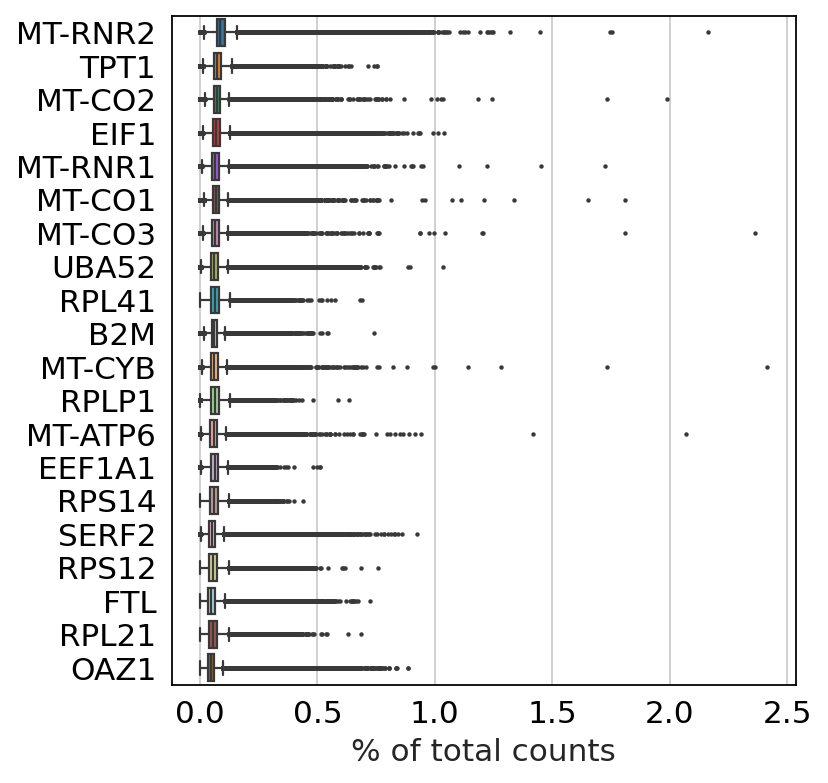

In [110]:
#Human dataset preprocessing
sc.pl.highest_expr_genes(adata_hum, n_top=20,)

In [146]:
#Filter genes
adata_hum.var_names_make_unique()
sc.pp.filter_cells(adata_hum, min_genes=200)
sc.pp.filter_genes(adata_hum, min_cells=3)
adata_hum.var['mt']=adata_hum.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_hum, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


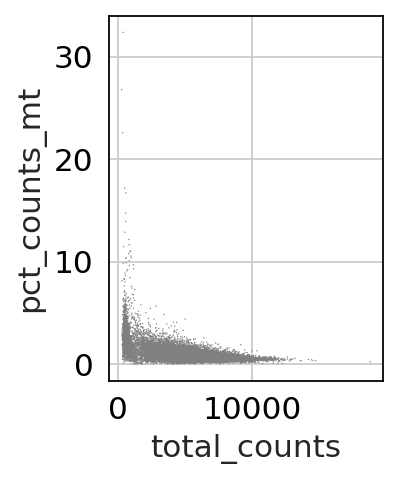

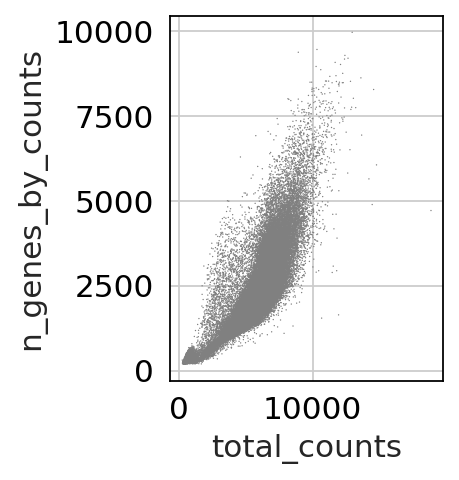

In [157]:
sc.pl.scatter(adata_hum, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_hum, x='total_counts', y='n_genes_by_counts')

In [161]:
#Scaling amd normalization of the data
adata_hum=adata_hum[adata_hum.obs.n_genes_by_counts < 2500, :]
adata_hum=adata_hum[adata_hum.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata_hum, target_sum=1e4)
sc.pp.log1p(adata_hum)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


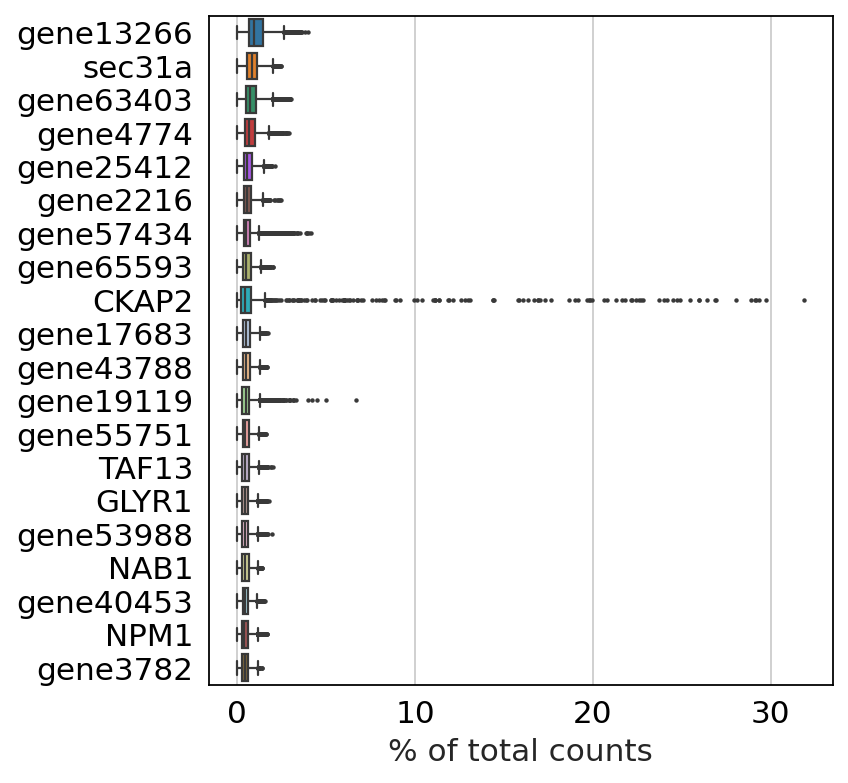

In [162]:
#Preprocessing of the pl data
sc.pl.highest_expr_genes(adata_pl, n_top=20,)

In [163]:
#Filter genes
adata_pl.var_names_make_unique()
sc.pp.filter_cells(adata_pl, min_genes=200)
sc.pp.filter_genes(adata_pl, min_cells=3)
adata_pl.var['mt']=adata_pl.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_pl, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


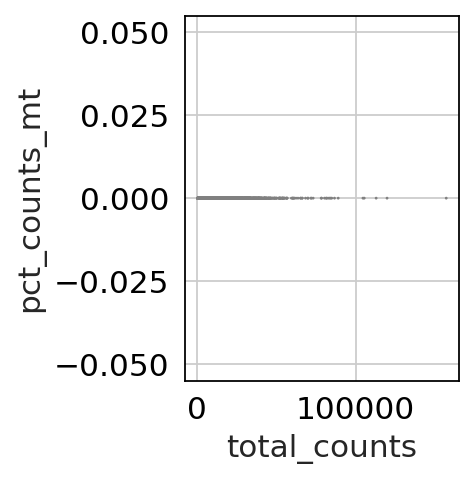

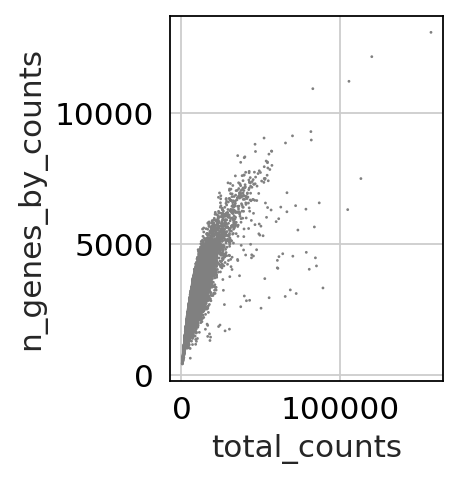

In [164]:
sc.pl.scatter(adata_pl, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_pl, x='total_counts', y='n_genes_by_counts')

In [165]:
#Scaling amd normalization of the data
adata_pl=adata_pl[adata_pl.obs.n_genes_by_counts < 2500, :]
adata_pl=adata_pl[adata_pl.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata_pl, target_sum=1e4)
sc.pp.log1p(adata_pl)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


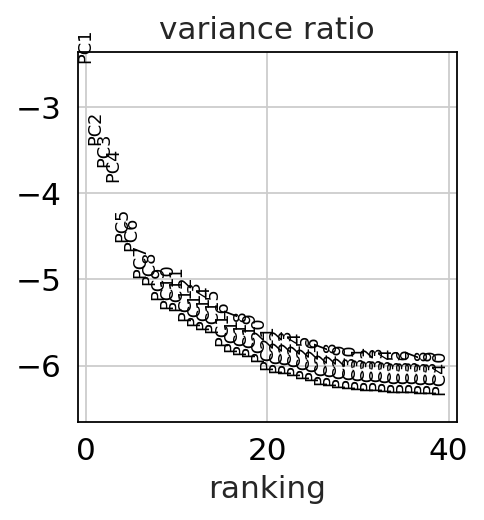

In [169]:
#Perforing pca and umap for the human data
sc.pp.pca(adata_hum,svd_solver='arpack',n_comps=40)
sc.pl.pca_variance_ratio(adata_hum, log=True, n_pcs=40)
sc.pp.neighbors(adata_hum,n_pcs=40, n_neighbors=15)
sc.tl.umap(adata_hum)
sc.tl.leiden(adata_hum)

In [170]:
adata_hum.obs['leiden'].value_counts()

leiden
0     7637
1     5276
2     5084
3     3763
4     3652
5     3226
6     2918
7     2758
8     2637
9     2322
10    2244
11    2158
12    1922
13    1740
14    1429
15    1343
16    1230
17    1164
18    1074
19     894
20     783
21     722
22     607
23     478
24     291
25     281
26     217
27     178
28     171
29      57
30      27
Name: count, dtype: int64

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


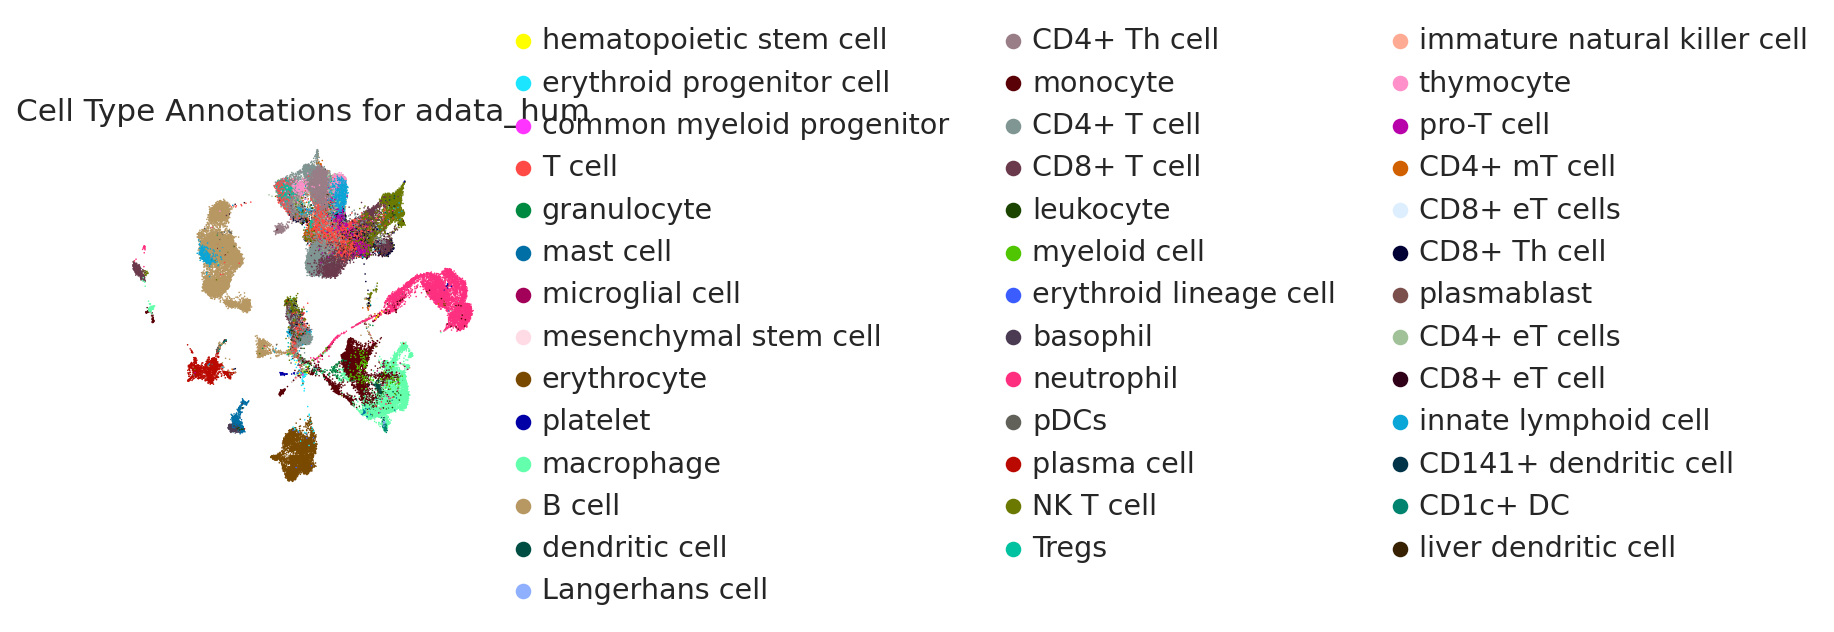

In [172]:

#Change the cell type names
cell_type_mapping={"liver dendritic cells":"dendritic cells","mature NK T cell":"NK T cell","CD8-positive, alpha-beta T cell":"CD8+ T cell","CD4-positive, alpha-beta T cell":"CD4+ T cell","double-positive, alpha-beta thymocyte":"CD4+ CD8+ thymocyte","CD4-positive, alpha-beta memory T cell":"CD4+ mT cell","CD8-positive, alpha-beta cytokine secreting effector T cell":"CD8+ eT cells","classical monocyte":"monocyte","naive B cell":"B cell","memory B cell":"B cell","type I NK T cell":"NK T cell","CD141-positive myeloid dendritic cell":"CD141+ dendritic cell","naive thymus-derived CD4-positiv, alpha-beta T cell":"CD4+ T cell","non-classical monocyte":"monocyte","effector CD8-positive, alpha-beta T cell":"CD8+ eT cell","effector CD4-positive, alpha-beta T cell":"CD4+ eT cells","regulatory T cell":"Tregs","CD1c-positive myeloid dendritic cell":"CD1c+ DC","intermediate monocyte":"monocyte","mature conventional dendritic cell":"dendritic cell","CD4-positive helper T cell":"CD4+ Th cell","CD8-positive, alpha-beta memory T cell":"CD8+ Th cell","naive thymus-derived CD8-positive, alpha-beta T cell":"CD8+ T cell","CD8-positive, alpha-beta cytotoxic T cell":"CD8+ T cell","plasmacytoid dendritic cell":"pDCs","naive regulatory T cell":"Tregs","T follicular helper cell":"T cell","DN4 thymocyte":"thymocyte","DN3 thymocyte":"thymocyte","DN1 thymic pro-T cell":"pro-T cell","naive thymus-derived CD4-positive, alpha-beta T cell":"CD4+ T cell","alpha-beta T cell":"T cell"}
adata_hum.obs['cell_type'] = adata_hum.obs['cell_type'].replace(cell_type_mapping)

#Umap plot for the human data
sc.pl.umap(adata_hum, color=['cell_type'], title='Cell Type Annotations for adata_hum')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


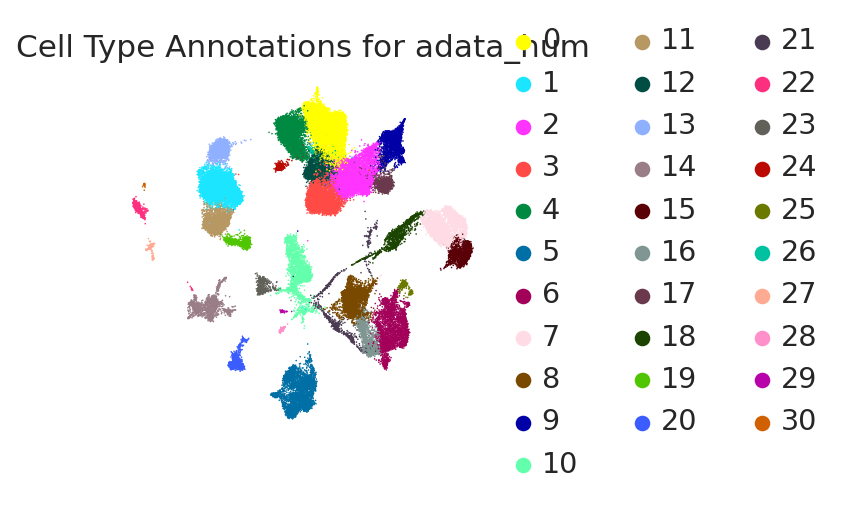

In [173]:
#Plot umap
sc.pl.umap(adata_hum, color=['leiden'], title='Cell Type Annotations for adata_hum')

In [174]:
#Find the clusters and their corresponding cell types
# Create a DataFrame to count the occurrences of cell types within each Louvain cluster
cluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['leiden'], adata_hum.obs['cell_type'])
cluster_celltype_counts_hum

cell_type  hematopoietic stem cell  erythroid progenitor cell  \
leiden                                                          
0                                0                          0   
1                                1                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
5                                0                         23   
6                                0                          0   
7                                0                          0   
8                                0                          0   
9                                0                          0   
10                              44                         41   
11                               0                          0   
12                               0                          0   
13                               0                          0   
14                               0                          0   
15                               0                          0   
16                               0                          0   
17                               0                          0   
18                               6                          0   
19                               0                          0   
20                               0                          0   
21                               0                          0   
22                               0                          0   
23                               0                          0   
24                               0                          0   
25                               0                          0   
26                               0                          0   
27                               0                          0   
28                               0                          0   
29                               0                          0   
30                               0                          0   

cell_type  common myeloid progenitor  T cell  granulocyte  mast cell  \
leiden                                                                 
0                                  0     894            0          0   
1                                  0       7            2          1   
2                                  0    1098            0          0   
3                                  0     232            0          0   
4                                  0     589            0          0   
5                                  0       0            0          0   
6                                  0       3            0          4   
7                                  0       0            0          0   
8                                  0       0           67          0   
9                                  0      17            0          1   
10                                 2     207           18         10   
11                                 0       4            0          0   
12                                 0    1157            0          0   
13                                 0      10            0          0   
14                                 0       0            0          0   
15                                 0       0            0          1   
16                                 0       2            0         19   
17                                 0      21            0          0   
18                                 0       0            2          0   
19                                 0       0            0          0   
20                                 0       1            0        583   
21                                 0       0            2          2   
22                                 0      13            0          0   
23                                 0       1          

In [201]:
#Add Species column to adata_hum
adata_hum.obs['Species'] = 'hs'

In [202]:
#Performing pca and umap for the pl data
sc.pp.pca(adata_pl,svd_solver='arpack',n_comps=40)
sc.pp.neighbors(adata_pl,n_pcs=40, n_neighbors=15)
sc.tl.umap(adata_pl)
sc.tl.leiden(adata_pl)

In [203]:
adata_pl.obs['leiden'].value_counts()

leiden
0     3156
1     2594
2     1512
3      973
4      953
5      750
6      698
7      356
8      300
9      167
10     156
11     129
12      90
13      85
14      59
Name: count, dtype: int64

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


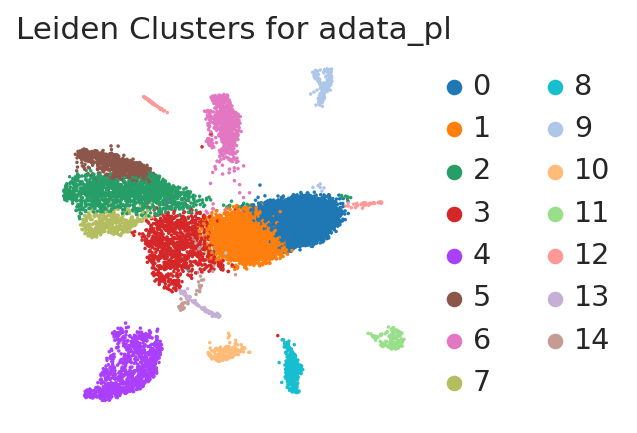

In [204]:
#Umap plot for the pl data
sc.pl.umap(adata_pl, color=['leiden'], title='Leiden Clusters for adata_pl')

In [205]:
#Assign species
adata_pl.obs['Species'] = 'pl'

In [206]:
#Filter var_names_common for adata_hum and adata_pl
import numpy as np
var_names_common_hum = adata_hum.var_names.intersection(adata_pl.var_names)
var_names_common_pl = adata_pl.var_names.intersection(adata_hum.var_names)
unique_var_names_common_hum = np.unique(var_names_common_hum)

unique_var_names_common_pl = np.unique(var_names_common_pl)


In [207]:
updated_mapper.keys()

dict_keys(['BANK1', 'RALGPS2', 'BLK', 'ARHGAP24', 'CD79B', 'CD22', 'FCRL1', 'SWAP70', 'FCER2', 'PAX5', 'MEF2C', 'FCRLA', 'POU2AF1', 'BLNK', 'CD37', 'NIBAN3', 'EBF1', 'CD40', 'IRF8', 'ADAM28', 'TCF4', 'FCRL2', 'PLCG2', 'DENND5B', 'LY9', 'ST6GAL1', 'FCRL5', 'STAG3', 'CXCR5', 'FCHSD2', 'CCDC50', 'AFF3', 'BCL11A', 'SMIM14', 'INPP5D', 'MARCHF1', 'SP140', 'RNGTT', 'ARID5B', 'WDFY4', 'TSPAN3', 'NEK6', 'BTK', 'TLR10', 'SPIB', 'FGD2', 'OSBPL10', 'PRKCB', 'PARP15', 'PDE4B', 'IKZF3', 'RHOB', 'RUBCNL', 'CYSLTR1', 'ANKRD44', 'NBEAL1', 'TAGAP', 'DAPP1', 'RASGEF1B', 'EZR', 'KBTBD8', 'STK17A', 'PDE7A', 'STRBP', 'HVCN1', 'CD69', 'PTPN6', 'CXCR4', 'POU2F2', 'STX7', 'VPREB3', 'CIITA', 'CD82', 'ITSN2', 'REL', 'TRAF5', 'LY86', 'MAP4K4', 'MAP3K1', 'ARHGAP17', 'SETBP1', 'TSPAN33', 'NCOA3', 'P2RX5', 'FCGR2B', 'CD180', 'DMXL1', 'CHD7', 'RASGRP2', 'P2RY10', 'PTPN1', 'BCAS4', 'ARID1B', 'BCL2', 'ZNF107', 'USP6NL', 'GPR183', 'SYT1', 'IDS', 'CSK', 'MEF2A', 'TMEM131', 'ARHGAP25', 'NR4A1', 'PLEKHG1', 'TFEB', 'CCR7', 

In [220]:
#Subset adata_hum and adata_pl to include only common genes
# Subset 'adata_hum' based on gene names from 'updated_mapper'
unique_hum = [i for i in updated_mapper.keys()]
unique_pl = [i for i in updated_mapper.values()]
# Subset 'adata_pl' based on gene names from 'updated_mapper'
adata_hum_common = adata_hum[:, np.isin(adata_hum.var_names, unique_hum)]
adata_pl_common = adata_pl[:, np.isin(adata_pl.var_names, unique_pl)]

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [221]:
adata_hum_common.var_names_make_unique()
adata_pl_common.var_names_make_unique()
#Concatenate adata_hum and adata_pl 
adata_ref = sc.concat([adata_hum_common, adata_pl_common], join='outer', index_unique=None)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


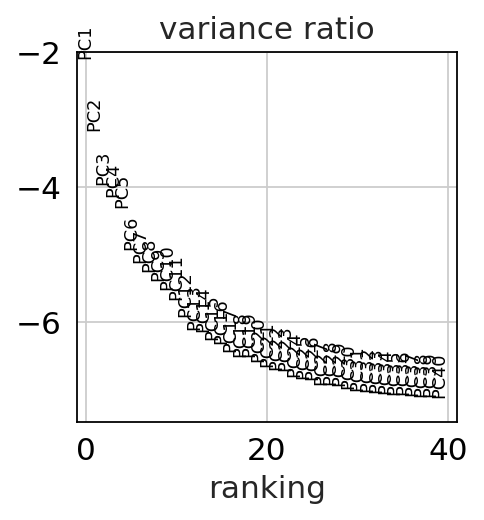

"\n# Create a DataFrame to count the occurrences of cell types within each Louvain cluster in adata_hum\ncluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['leiden'], adata_hum.obs['cell_type'])\n\n# Create a dictionary to map Louvain clusters to cell types based on the majority cell type in adata_hum\ncluster_to_celltype_mapping_hum = {}\nfor cluster_idx, row in cluster_celltype_counts_hum.iterrows():\n    # Check if there is a clear majority cell type in adata_hum for this cluster\n    if row.max() > sum(row) * 0.3:\n        most_prevalent_cell_type_hum = row.idxmax()        \n        cluster_to_celltype_mapping_hum[cluster_idx] = most_prevalent_cell_type_hum\n    else:\n        cluster_to_celltype_mapping_hum[cluster_idx] = 'Uncertain'  # Assign 'Uncertain' if no clear majority\n\n# Assign cell types to the Louvain clusters in adata_ref based on the mapping for adata_hum\nadata_ref.obs['cell_type'] = adata_ref.obs['leiden'].map(cluster_to_celltype_mapping_hum)\n"

In [222]:
#Perform scaling and normalization
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
#Perform Dimensionality reduction
sc.pp.pca(adata_ref,svd_solver='arpack',n_comps=40)
sc.pl.pca_variance_ratio(adata_ref, log=True, n_pcs=40)
sc.pp.neighbors(adata_ref,n_pcs=40, n_neighbors=15)
sc.tl.umap(adata_ref)
sc.tl.leiden(adata_ref)

#Label the louvain clusters with the cell_types
'''
# Create a DataFrame to count the occurrences of cell types within each Louvain cluster in adata_hum
cluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['leiden'], adata_hum.obs['cell_type'])

# Create a dictionary to map Louvain clusters to cell types based on the majority cell type in adata_hum
cluster_to_celltype_mapping_hum = {}
for cluster_idx, row in cluster_celltype_counts_hum.iterrows():
    # Check if there is a clear majority cell type in adata_hum for this cluster
    if row.max() > sum(row) * 0.3:
        most_prevalent_cell_type_hum = row.idxmax()        
        cluster_to_celltype_mapping_hum[cluster_idx] = most_prevalent_cell_type_hum
    else:
        cluster_to_celltype_mapping_hum[cluster_idx] = 'Uncertain'  # Assign 'Uncertain' if no clear majority

# Assign cell types to the Louvain clusters in adata_ref based on the mapping for adata_hum
adata_ref.obs['cell_type'] = adata_ref.obs['leiden'].map(cluster_to_celltype_mapping_hum)
'''


/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


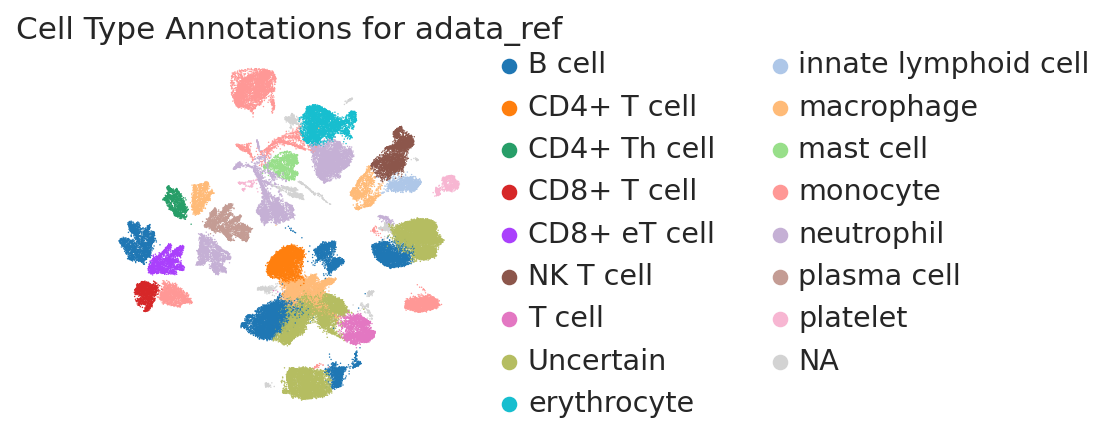

In [211]:
# You can visualize the Louvain clusters labeled with cell types 
sc.pl.umap(adata_ref, color=['cell_type'], title='Cell Type Annotations for adata_ref')

In [212]:
#Create a pd dataframe with the cell_type and louvain cluster
cluster_celltype_counts_ref = pd.crosstab(adata_ref.obs['leiden'], adata_ref.obs['cell_type'])
cluster_celltype_counts_ref

#Count the pl cells per louvain cluster in the common adata_ref
pl_common=pd.crosstab(adata_ref.obs['leiden'], adata_ref.obs['Species'])
pl_common

Species    hs    pl
leiden             
0        5553     0
1        4295     0
2        3860     0
3        3691     0
4        3656     0
5        3560     0
6        3442     0
7        3258     0
8        3205     0
9        3011     0
10       2591     0
11       2349     0
12       2096     0
13          0  2052
14          0  2043
15       2024     0
16       1781     0
17          0  1692
18          0  1674
19       1422     0
20       1321     0
21          0  1195
22          0  1183
23       1086     0
24          0  1086
25          0  1053
26       1044     0
27       1043     0
28        793     0
29        784     0
30        605     0
31        464     0
32        285     0
33        265     0
34        252     0
35        237     0
36        164     0
37         85     0
38         61     0

In [46]:
cluster_celltype_counts_ref

cell_type  hematopoietic stem cell  erythroid progenitor cell  \
leiden                                                          
0                                0                          0   
2                                0                          0   
3                                0                          0   
4                                2                          0   
5                                0                          0   
6                                0                          0   
8                                0                          0   
9                                0                         29   
10                               0                          0   
11                               0                          0   
12                               0                          0   
13                               0                          0   
14                               0                          0   
15                               0                          0   
16                               1                          3   
17                               0                          0   
18                               0                          0   
19                               0                          0   
20                               0                          0   
21                               0                          0   
22                               0                          0   
23                               0                          0   
24                               6                          0   
25                               0                          0   
26                               0                          0   
27                             228                        219   
28                               0                          0   
29                               0                          1   
30                               0                          0   
31                               0                          0   
32                               0                          0   
33                               0                          0   
34                               0                          0   
35                               0                          0   
36                               0                          0   
37                               0                          0   
38                               0                          0   
39                               0                          0   

cell_type  common myeloid progenitor  T cell  granulocyte  mast cell  \
leiden                                                                 
0                                  0     931            0          0   
2                                  0       6            1          1   
3                                  0       0            0          0   
4                                  0      15           21         23   
5                                  0    1307            0          1   
6                                  0       7            1          0   
8                                  0     484            0          0   
9                                  0       0            0          0   
10                                 0       1            0          0   
11                                 0       0            0          0   
12                                 0     163            0          0   
13                                 0      26            0          0   
14                                 0       0            0          0   
15                                 0       1            0          0   
16                                 0     232            0          3   
17                                 0      24            0          0   
18                                 0       0            0          0   
19                             

In [47]:
#Now assign clusters based on the annotation of the max number of cells in the cluster
#cluster_celltype_counts_hum
#cluster_to_celltype_mapping_hum

NameError: name 'cluster_to_celltype_mapping_hum' is not defined

In [48]:
#BRUTE FORCE METHOD

cluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['leiden'], adata_hum.obs['cell_type'])

# Create a dictionary to map Louvain clusters to the most prevalent cell type in adata_hum
#cluster_to_celltype_mapping_hum = {}
#for cluster_idx, row in cluster_celltype_counts_hum.iterrows():
#    most_prevalent_cell_type_hum = row.idxmax()
#    cluster_to_celltype_mapping_hum[cluster_idx] = most_prevalent_cell_type_hum

# Assign cell types to the Louvain clusters in adata_ref based on the mapping for adata_hum
#adata_ref.obs['cell_type'] = adata_ref.obs['leiden'].map(cluster_to_celltype_mapping_hum)

In [ ]:
# You can visualize the Louvain clusters labeled with cell types
#sc.pl.umap(adata_ref, color=['cell_type'], title='Cell Type Annotations for adata_ref')

In [213]:
#Correcting for batch effects using combat
sc.pp.combat(adata_ref, key='Species')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_info = model.groupby(key).indices.values()
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_items = model.groupby(batch_key).groups.items()


Found 6 genes with zero variance.


/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


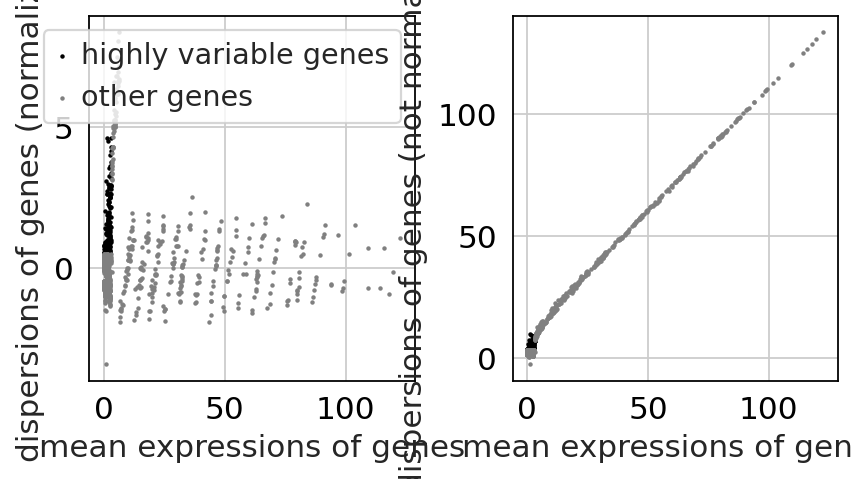

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [214]:
sc.pp.highly_variable_genes(adata_ref)
sc.pl.highly_variable_genes(adata_ref)

sc.pp.pca(adata_ref, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.tl.leiden(adata_ref)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


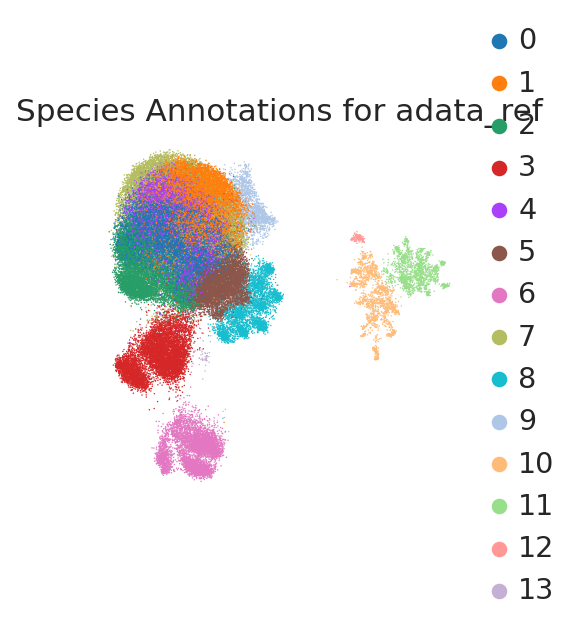

In [217]:
sc.pl.umap(adata_ref, color=['leiden'], title='Species Annotations for adata_ref')
# Create a DataFrame to count the occurrences of cell types within each Louvain cluster in adata_hum
cluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['leiden'], adata_hum.obs['cell_type'])

# Create a dictionary to map Louvain clusters to cell types based on the majority cell type in adata_hum
cluster_to_celltype_mapping_hum = {}
for cluster_idx, row in cluster_celltype_counts_hum.iterrows():
    # Check if there is a clear majority cell type in adata_hum for this cluster
    if row.max() > sum(row) * 0.3:
        most_prevalent_cell_type_hum = row.idxmax()        
        cluster_to_celltype_mapping_hum[cluster_idx] = most_prevalent_cell_type_hum
    else:
        cluster_to_celltype_mapping_hum[cluster_idx] = 'Uncertain'  # Assign 'Uncertain' if no clear majority

# Assign cell types to the Louvain clusters in adata_ref based on the mapping for adata_hum
adata_ref.obs['cell_type'] = adata_ref.obs['leiden'].map(cluster_to_celltype_mapping_hum)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


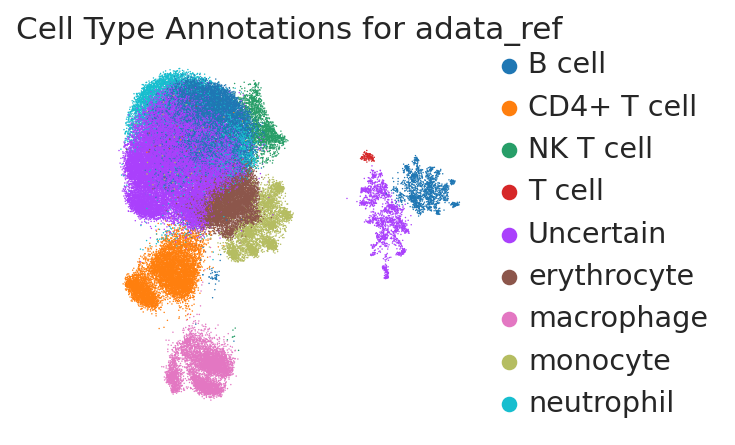

In [218]:
# You can visualize the Louvain clusters labeled with cell types
sc.pl.umap(adata_ref, color=['cell_type'], title='Cell Type Annotations for adata_ref')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


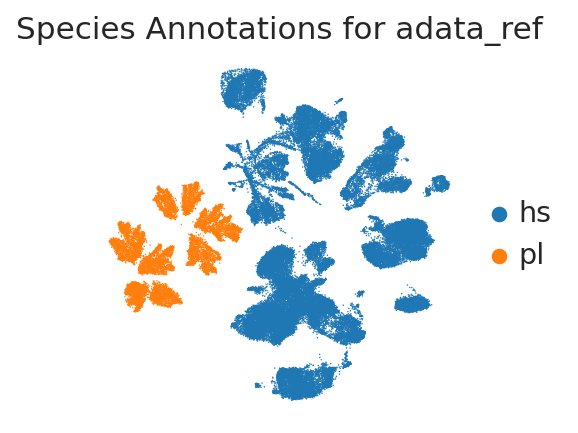

In [250]:
sc.pl.umap(adata_ref, color=['Species'], title='Species Annotations for adata_ref')

In [216]:
leiden_combat = pd.crosstab(adata_ref.obs['leiden'], adata_ref.obs['Species'])
leiden_combat

Species     hs    pl
leiden              
0        10679  1025
1        11188   352
2         7575   468
3         7143    56
4         6398   575
5          519  5669
6         5132     3
7         4630   372
8            0  3457
9         1746     1
10        1570     0
11        1543     0
12         118     0
13          42     0

In [219]:
cluster_celltype_counts_hum

cell_type  hematopoietic stem cell  erythroid progenitor cell  \
leiden                                                          
0                                0                          0   
1                                1                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
5                                0                         23   
6                                0                          0   
7                                0                          0   
8                                0                          0   
9                                0                          0   
10                              44                         41   
11                               0                          0   
12                               0                          0   
13                               0                          0   
14                               0                          0   
15                               0                          0   
16                               0                          0   
17                               0                          0   
18                               6                          0   
19                               0                          0   
20                               0                          0   
21                               0                          0   
22                               0                          0   
23                               0                          0   
24                               0                          0   
25                               0                          0   
26                               0                          0   
27                               0                          0   
28                               0                          0   
29                               0                          0   
30                               0                          0   

cell_type  common myeloid progenitor  T cell  granulocyte  mast cell  \
leiden                                                                 
0                                  0     894            0          0   
1                                  0       7            2          1   
2                                  0    1098            0          0   
3                                  0     232            0          0   
4                                  0     589            0          0   
5                                  0       0            0          0   
6                                  0       3            0          4   
7                                  0       0            0          0   
8                                  0       0           67          0   
9                                  0      17            0          1   
10                                 2     207           18         10   
11                                 0       4            0          0   
12                                 0    1157            0          0   
13                                 0      10            0          0   
14                                 0       0            0          0   
15                                 0       0            0          1   
16                                 0       2            0         19   
17                                 0      21            0          0   
18                                 0       0            2          0   
19                                 0       0            0          0   
20                                 0       1            0        583   
21                                 0       0            2          2   
22                                 0      13            0          0   
23                                 0       1          

In [ ]:
#Annotate clusters with cell types from adata_hum

In [224]:
#Using Scanorama to correct batch effect
adata_ref.obs['Species'] = adata_ref.obs['Species'].astype('category')
batches=adata_ref.obs['Species'].cat.categories.tolist()
alldata={}
for batch in batches:
    alldata[batch]=adata_ref[adata_ref.obs['Species']==batch]
alldata


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


{'hs': View of AnnData object with n_obs × n_vars = 58283 × 2974
     obs: 'tissue_in_publication', 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Species', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'soup_assign', 'soup_status', 'scds_DropletType', 'combined_status', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident'
     var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nb

In [260]:
sc.pp.highly_variable_genes(adata_ref,batch_key='Species')
var_genes_select=adata_ref.var.highly_variable_nbatches>1
var_genes=var_genes_select.index[var_genes_select]
len(var_genes)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variab

25

In [267]:
import scanorama
alldata2=dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds]=alldata[ds][:,var_genes]
#Convert to list of AnnData objects
adata_batch=[i for i in alldata2.values()]

#Run Scanorama

scanorama.integrate_scanpy(adata_batch,dimred=100)


hs
pl
Found 25 genes among all datasets


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


[[0.         0.06729003]
 [0.         0.        ]]


In [268]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adata_batch]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object, create a new object first
adata_sc_ref = adata_ref.copy()
adata_sc_ref.obsm["Scanorama"] = all_s

(70261, 25)


In [ ]:
#Performing pca and umap for the scanorama data
sc.pp.pca(adata_sc_ref,svd_solver='arpack')
sc.pp.neighbors(adata_sc_ref,use_rep='Scanorama')
sc.tl.umap(adata_sc_ref)
sc.tl.leiden(adata_sc_ref)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
#Plot the UMAP
sc.pl.umap(adata_sc_ref, color=['cell_type'], title='Species Annotations for adata_sc_ref')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


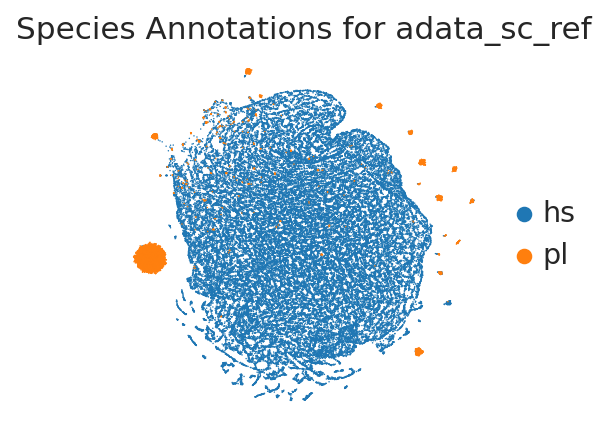

In [266]:
sc.pl.umap(adata_sc_ref, color=['Species'], title='Species Annotations for adata_sc_ref')


In [257]:
leiden_scanorama = pd.crosstab(adata_sc_ref.obs['leiden'], adata_sc_ref.obs['Species'])
leiden_scanorama

Species    hs    pl
leiden             
0        5553     0
1        4295     0
2        3860     0
3        3691     0
4        3656     0
5        3560     0
6        3442     0
7        3258     0
8        3205     0
9        3011     0
10       2591     0
11       2349     0
12       2096     0
13          0  2052
14          0  2043
15       2024     0
16       1781     0
17          0  1692
18          0  1674
19       1422     0
20       1321     0
21          0  1195
22          0  1183
23       1086     0
24          0  1086
25          0  1053
26       1044     0
27       1043     0
28        793     0
29        784     0
30        605     0
31        464     0
32        285     0
33        265     0
34        252     0
35        237     0
36        164     0
37         85     0
38         61     0